In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#read data
dset = pd.read_csv("/content/Data_Inflation.csv",sep=",", encoding='latin-1')

**Data Analysis with pandas and numpy**

In [6]:
#View the data
dset.head(10)

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN
5,Developing Asia,2023 forecast,4.2,%,NaN,NaN
6,Developing Asia,2024 forecast,3.3,%,NaN,NaN
7,Developing Asia excluding the PRC,2018,3.3,%,NaN,NaN
8,Developing Asia excluding the PRC,2019,3.5,%,NaN,NaN
9,Developing Asia excluding the PRC,2020,4.1,%,NaN,NaN


In [7]:
dset.dtypes.value_counts()

object     5
float64    1
dtype: int64

In [8]:
#Types into object
dset.dtypes == 'object'

RegionalMember          True
Year                    True
Inflation              False
Unit of Measurement     True
 Subregion              True
 Country Code           True
dtype: bool

In [9]:
#Drop columns Unit of Measurement
dset = dset.drop(columns=['Unit of Measurement'])

**Changing columns to list**

**Renaming the columns by removing unnecessary space between then**

In [10]:
print(dset.columns.tolist())

['RegionalMember', 'Year', 'Inflation', ' Subregion', ' Country Code']


In [11]:
#rename the columns
dset.rename(columns={' Country Code': 'CountryCode', ' Subregion': 'Subregion'}, inplace=True)

<Axes: >

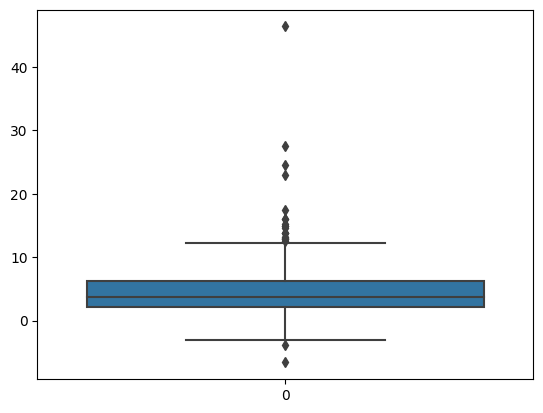

In [12]:
#Inflation box plot
import seaborn as sns
# Box plot
sns.boxplot(dset.Inflation)

In [13]:
dset['Subregion'].value_counts()

The Pacific       105
Southeast Asia     84
Central Asia       63
South Asia         63
East Asia          42
Name: Subregion, dtype: int64

In [14]:
dset["Inflation"].describe() #Inflation Description

count    365.000000
mean       4.728767
std        4.555189
min       -6.600000
25%        2.200000
50%        3.700000
75%        6.200000
max       46.400000
Name: Inflation, dtype: float64

In [15]:
#total Empty in dataset
dset.isna().sum().sum()

69

**Missing Values in all columns**

In [16]:

cc = dset['CountryCode'].isna().sum()
sr = dset['Subregion'].isna().sum()
rm = dset['RegionalMember'].isna().sum()
ifn = dset['Inflation'].isna().sum()
print("Countrycode",cc)
print("Subregion",sr)
print("Regional Membr",rm)
print("Inflation",ifn)

Countrycode 49
Subregion 14
Regional Membr 0
Inflation 6


In [17]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RegionalMember  371 non-null    object 
 1   Year            371 non-null    object 
 2   Inflation       365 non-null    float64
 3   Subregion       357 non-null    object 
 4   CountryCode     322 non-null    object 
dtypes: float64(1), object(4)
memory usage: 14.6+ KB


**Replacing Inflation missing values with not available for now and after removing all the missing values rows, it is again changed to NaN**

In [18]:

dset["Inflation"] = dset["Inflation"].fillna("not available")

In [19]:
#Number of missing values per column
dset.isnull().sum()

RegionalMember     0
Year               0
Inflation          0
Subregion         14
CountryCode       49
dtype: int64

Deleting other values which is NaN

In [20]:
dset = dset.dropna(axis=0)

In [21]:
dset.isnull().sum()

RegionalMember    0
Year              0
Inflation         0
Subregion         0
CountryCode       0
dtype: int64

In [22]:
dset['Subregion'].value_counts()

The Pacific       98
Southeast Asia    77
Central Asia      56
South Asia        56
East Asia         35
Name: Subregion, dtype: int64

In [23]:
dset['CountryCode'].value_counts()


ARM    7
FJI    7
MYS    7
MMR    7
PHL    7
SGP    7
THA    7
TLS    7
VNM    7
COO    7
FSM    7
KIR    7
AZE    7
MHL    7
NRU    7
NIU    7
PLW    7
PNG    7
WSM    7
SLB    7
TON    7
TUV    7
LAO    7
IDN    7
KHM    7
BRN    7
GEO    7
KAZ    7
KGZ    7
TJK    7
TKM    7
UZB    7
HKG    7
MNG    7
CHN    7
KOR    7
TWN    7
AFG    7
BGD    7
BTN    7
IND    7
MDV    7
NPL    7
PAK    7
LKA    7
VUT    7
Name: CountryCode, dtype: int64

In [24]:
dset['RegionalMember'].value_counts()

Armenia                           7
Fiji                              7
Malaysia                          7
Myanmar                           7
Philippines                       7
Singapore                         7
Thailand                          7
Timor-Leste                       7
Viet Nam                          7
Cook Islands                      7
Federated States of Micronesia    7
Kiribati                          7
Azerbaijan                        7
Marshall Islands                  7
Nauru                             7
Niue                              7
Palau                             7
Papua New Guinea                  7
Samoa                             7
Solomon Islands                   7
Tonga                             7
Tuvalu                            7
Lao Peoples Dem. Rep.            7
Indonesia                         7
Cambodia                          7
Brunei Darussalam                 7
Georgia                           7
Kazakhstan                  

Replace "not available" values which is changed before to NaN again.
 Here, We are predicting Inflation 

In [25]:
#Again now replace not availble with nan 
dset['Inflation']= dset['Inflation'].replace('not available', np.nan)

<ipython-input-25-7db2595f3f02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dset['Inflation']= dset['Inflation'].replace('not available', np.nan)


In [26]:
dset.head(10)

,RegionalMember,Year,Inflation,Subregion,CountryCode
21,Armenia,2018,2.5,Central Asia,ARM
22,Armenia,2019,1.4,Central Asia,ARM
23,Armenia,2020,1.2,Central Asia,ARM
24,Armenia,2021,7.2,Central Asia,ARM
25,Armenia,2022,8.6,Central Asia,ARM
26,Armenia,2023 forecast,7.0,Central Asia,ARM
27,Armenia,2024 forecast,6.2,Central Asia,ARM
28,Azerbaijan,2018,2.4,Central Asia,AZE
29,Azerbaijan,2019,2.7,Central Asia,AZE
30,Azerbaijan,2020,2.8,Central Asia,AZE


In [27]:
#Sort values according to nan of inflation
dset = dset.sort_values(by="Inflation", ascending=False, na_position='first')

**One Hot Encoding to dataset**

In [28]:
#One hot encoding to whole data
dset_one_hot_encoding = pd.get_dummies(dset)

In [29]:
print("Dataset dimension",dset_one_hot_encoding.shape)

Dataset dimension (322, 105)


In [30]:
type(dset_one_hot_encoding)

pandas.core.frame.DataFrame

In [31]:
print(dset_one_hot_encoding)

     Inflation  RegionalMember_Afghanistan  RegionalMember_Armenia  \
131        NaN                           1                       0   
132        NaN                           1                       0   
318        NaN                           0                       0   
319        NaN                           0                       0   
320        NaN                           0                       0   
..         ...                         ...                     ...   
295       -1.8                           0                       0   
289       -2.6                           0                       0   
339       -3.0                           0                       0   
350       -3.9                           0                       0   
310       -6.6                           0                       0   

     RegionalMember_Azerbaijan  RegionalMember_Bangladesh  \
131                          0                          0   
132                          0       

In [32]:
dset.isnull().sum()

RegionalMember    0
Year              0
Inflation         6
Subregion         0
CountryCode       0
dtype: int64

In [33]:
dset.head(2)

,RegionalMember,Year,Inflation,Subregion,CountryCode
131,Afghanistan,2023 forecast,NaN,South Asia,AFG
132,Afghanistan,2024 forecast,NaN,South Asia,AFG


**Dividing data into two groups having missing values of Inflation and without missing values**

In [34]:
#Dividing data into two groups having missing values and non missing values
column_with_nan = "Inflation"
data_with_nan = dset_one_hot_encoding[dset_one_hot_encoding[column_with_nan].isnull()]
data_without_nan = dset_one_hot_encoding[dset_one_hot_encoding[column_with_nan].notnull()]

In [35]:
print("Dset without nan dimension",data_without_nan.shape)
print("Dset with nan dimension",data_with_nan.shape)
type(data_without_nan)

Dset without nan dimension (316, 105)
Dset with nan dimension (6, 105)


pandas.core.frame.DataFrame

In [36]:
data_without_nan.head(2)

,Inflation,RegionalMember_Afghanistan,RegionalMember_Armenia,RegionalMember_Azerbaijan,RegionalMember_Bangladesh,RegionalMember_Bhutan,RegionalMember_Brunei Darussalam,RegionalMember_Cambodia,RegionalMember_Cook Islands,RegionalMember_Federated States of Micronesia,...,CountryCode_TJK,CountryCode_TKM,CountryCode_TLS,CountryCode_TON,CountryCode_TUV,CountryCode_TWN,CountryCode_UZB,CountryCode_VNM,CountryCode_VUT,CountryCode_WSM
179,46.4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,27.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#Create train from non_missing values
X_train = data_without_nan.drop('Inflation',axis=1)
y_train = data_without_nan["Inflation"]

In [38]:
xx_train = X_train.iloc[1:6]
yy_train = y_train.iloc[1:6]

In [39]:
type(xx_train)

pandas.core.frame.DataFrame

In [40]:
xx_train

,RegionalMember_Afghanistan,RegionalMember_Armenia,RegionalMember_Azerbaijan,RegionalMember_Bangladesh,RegionalMember_Bhutan,RegionalMember_Brunei Darussalam,RegionalMember_Cambodia,RegionalMember_Cook Islands,RegionalMember_Federated States of Micronesia,RegionalMember_Fiji,...,CountryCode_TJK,CountryCode_TKM,CountryCode_TLS,CountryCode_TON,CountryCode_TUV,CountryCode_TWN,CountryCode_UZB,CountryCode_VNM,CountryCode_VUT,CountryCode_WSM
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train = X_train.values
y_train = y_train.values
xx_train = xx_train.values
yy_train = yy_train.values

In [42]:
type(X_train)

numpy.ndarray

In [43]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Using RandomForest Regressor


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42,min_sample_split = 2)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [46]:
print(len(X_train))
print(X_train.shape)

316
(316, 104)


In [47]:
# from sklearn import model_selection
# import pickle
# filename = "testmodel.sav"
# pickle.dump(rf, open(filename, 'wb'))


In [48]:
#pickle.dump(rf, open('pklmodel.pkl', 'wb'))


In [49]:
#Create test from missing values
x_test = data_with_nan.drop('Inflation',axis=1)
# x_test.values

In [50]:
Train_x = X_train.shape
Train_y = y_train.shape
print("X_train",Train_x)
print("y_train",Train_y)
test_x = x_test.shape
print("X_test",test_x)

X_train (316, 104)
y_train (316,)
X_test (6, 104)


In [51]:
type(X_train)

numpy.ndarray

In [99]:
predicted_values = rf.predict(xx_train)

In [53]:
print("Predicted Values from RandomForest",predicted_values)

Predicted Values from RandomForest [21.262 19.214 18.392 14.498 11.89 ]


In [100]:
print(predicted_values)
print(yy_train)

[20.9028 18.0008 16.5859 14.33   12.0011]
[27.5 24.6 23.  17.5 16. ]


In [55]:
# type(yy_train)
type(predicted_values)

numpy.ndarray

In [105]:
#Predicting single values from a model
single_test = [["Georgia","2020","Central Asia","GEO"]]
single_test = pd.DataFrame(single_test)
#Increase shape
desired_shape = (1,104)
# Check if the desired shape is larger than the initial shape
if desired_shape[1] > single_test.shape[1]:
    # Calculate the number of additional columns needed
    num_additional_columns = desired_shape[1] - single_test.shape[1]
    
    # Create a new array with the desired shape, filled with zeros
    expanded_array = np.pad(single_test, ((0, 0), (0, num_additional_columns)), mode='constant')

    # Verify the new shape
    print("Expanded array shape:", expanded_array.shape)
    # print(expanded_array)

Expanded array shape: (1, 104)


In [106]:
#One hot encoding to a dataframe

expanded_array_df = pd.DataFrame(expanded_array)
encoded_single = pd.get_dummies(expanded_array_df)

In [107]:
encoded_single = encoded_single.values

In [110]:
#Predict test a model
predice = rf.predict(encoded_single)
print(predice)

TypeError: ignored

In [60]:
print(encoded_single)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


**Graph Plot between original and predicted**

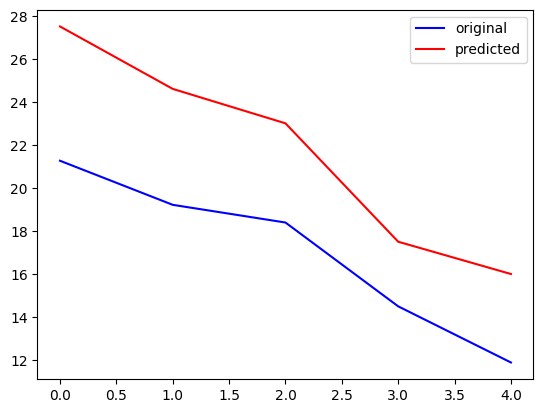

In [61]:

import sklearn.metrics as metrics
import matplotlib.pyplot as plt
y = np.array(predicted_values)
yhat = np.array(yy_train)
x = list(range(len(y)))

plt.plot(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show() 

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(yhat,y)
rmse = mean_squared_error(yhat,y, squared=False)
print("Mean Square Error",rmse)
print("Mean absolute percentage error",mape)
print("Mean Absolute Error",mean_absolute_error(yy_train,predicted_values))

Mean Square Error 4.797070105804164
Mean absolute percentage error 0.21490902725941421
Mean Absolute Error 4.668799999999997


Using Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
#Predict for Inflation
y_pred_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [66]:
print("Predicted Values from LinearRegression",y_pred_lr)
print("Original",yy_train)

Predicted Values from LinearRegression [10.      7.5     2.8125  6.25    5.3125  2.75  ]
Original [27.5 24.6 23.  17.5 16. ]
